In [0]:
!pip install spacy

In [0]:
!python -m spacy download en_core_web_lg

In [0]:
import pandas as pd
import numpy as np
import spacy
from spacy.lang.en import English

In [0]:
fname = 'book_title and description 0k to 10k.csv'
df = pd.read_csv(fname).drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
df = df.fillna('N/A')
df.head()

,book_title,description
0,The Hunger Games,"Could you survive on your own, in the wild, wi..."
1,Harry Potter and the Order of the Phoenix,There is a door at the end of a silent corrido...
2,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...
3,Pride and Prejudice,Alternate cover edition of ISBN 9780679783268S...
4,Twilight,About three things I was absolutely positive.F...


In [0]:
%%time
#docs
nlp = spacy.load("en_core_web_lg")
docs = list(nlp.pipe(df.description))
df['docs'] = docs

custom_stops = ['\n', '\n\n', '$', ' ', '\r\r\n']

#lemmas
lemmas = []
for doc in docs:
    lemma = []
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON') and (token.text not in custom_stops):
            lemma.append(token.lemma_)
    lemmas.append(lemma)
    
df['lemmas'] = lemmas

CPU times: user 3min 53s, sys: 1min 25s, total: 5min 19s
Wall time: 5min 19s


In [0]:
df.head()

,book_title,description,docs,lemmas
0,The Hunger Games,"Could you survive on your own, in the wild, wi...","(Could, you, survive, on, your, own, ,, in, th...","[survive, wild, sure, live, morning?in, ruin, ..."
1,Harry Potter and the Order of the Phoenix,There is a door at the end of a silent corrido...,"(There, is, a, door, at, the, end, of, a, sile...","[door, end, silent, corridor, ’, haunt, Harry,..."
2,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...,"(The, unforgettable, novel, of, a, childhood, ...","[unforgettable, novel, childhood, sleepy, sout..."
3,Pride and Prejudice,Alternate cover edition of ISBN 9780679783268S...,"(Alternate, cover, edition, of, ISBN, 97806797...","[alternate, cover, edition, ISBN, 978067978326..."
4,Twilight,About three things I was absolutely positive.F...,"(About, three, things, I, was, absolutely, pos...","[thing, absolutely, positive, Edward, vampire,..."


## Spacy Similarity

In [0]:
import random

def get_random_num():
    return random.choice(range(10000))

In [0]:
#compare test_doc vs random book:
test_doc = df.iloc[0].docs
random_num = get_random_num()

similarity = test_doc.similarity(df.iloc[random_num].docs)
similarity

0.9610987746528274

In [0]:
df.iloc[random_num]

book_title              April 1865: The Month That Saved America
description    One month in 1865 witnessed the frenzied fall ...
docs           (One, month, in, 1865, witnessed, the, frenzie...
lemmas         [month, 1865, witness, frenzied, fall, Richmon...
Name: 7755, dtype: object

In [0]:
def get_sims(test_doc):
    sims = []
    for doc in df.docs:
        sim = test_doc.similarity(doc)
        sims.append(sim)
    top5 = pd.Series(sims).sort_values(ascending=False).iloc[1:6]
    for i in top5.index:
        print(df.iloc[i].book_title)
        print(df.iloc[i].description)
        print('\n')
    return top5


### Similarity based on actual book description

In [0]:
random_num = get_random_num()

print(df.iloc[random_num].book_title)
print(df.iloc[random_num].description)
test_doc = df.iloc[random_num].docs

get_sims(test_doc)

Legion
"Stephen Leeds, AKA 'Legion,' is a man whose unique mental condition allows him to generate a multitude of personae: hallucinatory entities with a wide variety of personal characteristics and a vast array of highly specialized skills. As the story begins, Leeds and his 'aspects' are drawn into the search for the missing Balubal Razon, inventor of a camera whose astonishing
"Stephen Leeds, AKA 'Legion,' is a man whose unique mental condition allows him to generate a multitude of personae: hallucinatory entities with a wide variety of personal characteristics and a vast array of highly specialized skills. As the story begins, Leeds and his 'aspects' are drawn into the search for the missing Balubal Razon, inventor of a camera whose astonishing properties could alter our understanding of human history and change the very structure of society"--From publisher's description
The Starbirth Assignment: Shifter
Librarian's note: This edition's ASIN is in conflict with The Starbirth Assig

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)


4709    0.963086
8074    0.962167
9156    0.960983
2736    0.960194
9342    0.959717
dtype: float64

### User generated description

In [0]:
test_doc = nlp('a thrilling spy novel set in post-war russia')
top5 = get_sims(test_doc)
top5

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)


The Cruel Sea
A powerful novel of the North Atlantic in World War II, this is the story of the British ships Compass Rose and Saltash and of their desparate cat-and-mouse game with Nazi U-boats. First published to great acclaim in 1951, The Cruel Sea remains a classic novel of endurance and daring.


Palace Walk
Volume I of the masterful Cairo Trilogy. A national best-seller in both hardcover and paperback, it introduces the engrossing saga of a Muslim family in Cairo during Egypt's occupation by British forces in the early 1900s.


The Things They Carried
In 1979, Tim O'Brien's Going After Cacciato—a novel about the Vietnam War—won the National Book Award. In this, his second work of fiction about Vietnam, O'Brien's unique artistic vision is again clearly demonstrated. Neither a novel nor a short story collection, it is an arc of fictional episodes, taking place in the childhoods of its characters, in the jungles of Vietnam
In 1979, Tim O'Brien's Going After Cacciato—a novel about the

5679    0.853894
7672    0.852370
298     0.852295
2261    0.850206
7722    0.847824
dtype: float64

In [0]:
test_doc = nlp('love story high school friends joy and heartache')
get_sims(test_doc)

Fallen in Love
Unexpected. Unrequited. Forbidden. Eternal. Everyone has their own love story.And in a twist of fate, four extraordinary love stories combine over the course of a romantic Valentine's Day in Medieval England. Miles and Shelby find love where they least expect it. Roland learns a painful lesson about finding and losing love. Arianne pays the price for a love so fierce it bu
Unexpected. Unrequited. Forbidden. Eternal. Everyone has their own love story.And in a twist of fate, four extraordinary love stories combine over the course of a romantic Valentine's Day in Medieval England. Miles and Shelby find love where they least expect it. Roland learns a painful lesson about finding and losing love. Arianne pays the price for a love so fierce it burns. And for the first and last time, Daniel and Luce will spend a night together like none other. Lauren Kate's Fallen in Love is filled with love stories . . . the ones everyone has been waiting for. True love never says goodbye . .

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)


3423    0.865868
5785    0.865009
1179    0.863292
5331    0.863093
1146    0.862324
dtype: float64

In [0]:
test_doc = nlp('princess in search of prince charming evil stepmother')
get_sims(test_doc)

The Hollow Kingdom
In nineteenth-century England, a powerful sorcerer and King of the Goblins chooses Kate, the elder of two orphan girls recently arrived at their ancestral home, Hallow Hill, to become his bride and queen...


Princess of Glass
Hoping to escape the troubles in her kingdom, Princess Poppy reluctantly agrees to take part in a royal exchange program, whereby young princes and princesses travel to each other's countries in the name of better political alliances--and potential marriages. It's got the makings of a fairy tale--until a hapless servant named Eleanor is tricked by a vengeful fairy godmothe
Hoping to escape the troubles in her kingdom, Princess Poppy reluctantly agrees to take part in a royal exchange program, whereby young princes and princesses travel to each other's countries in the name of better political alliances--and potential marriages. It's got the makings of a fairy tale--until a hapless servant named Eleanor is tricked by a vengeful fairy godmother i

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)


4468    0.824254
4093    0.814074
3523    0.804395
2141    0.804371
2912    0.804315
dtype: float64

## TF-IDF Vectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = []
#convert each row list of lemmas into strings, then append to one big list:
for lemma in list(df['lemmas']):
    data.append(' '.join(lemma))
    
#Vectorize:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
feat_matrix = tfidf.fit_transform(data)
dense_feat_matrix = feat_matrix.todense()
features = tfidf.get_feature_names()

# View Feature Matrix as DataFrame
tfidf_df = pd.DataFrame(dense_feat_matrix, columns=features)
tfidf_df.head()

In [0]:
# Instantiate
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')

# Fit on TF-IDF Vectors
nn.fit(dense_feat_matrix)

In [0]:
random_num = get_random_num()
print(df.iloc[random_num].book_title)
print(df.iloc[random_num].description)
(print('\n'))

test_doc = [df.iloc[random_num].description]

test_doc_transformed = tfidf.transform(test_doc).todense()

# Query Using kneighbors:
test_doc_nn = nn.kneighbors(test_doc_transformed)[1][0]

for num in test_doc_nn:
    print(df.iloc[num].book_title)

## Topic Modelling

In [0]:
!pip install --upgrade pip

In [0]:
!pip install gensim

In [0]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore
from matplotlib import pyplot as plt
from gensim.models.coherencemodel import CoherenceModel

In [0]:
def compute_coherence_values(tokens, id2word, corpus, limit, start=2, step=3):
    coherence_values = {}
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, workers=4)
        coherencemodel = CoherenceModel(model=model, texts=tokens, dictionary=id2word, coherence='c_v')
        coherence_values[num_topics] = coherencemodel.get_coherence()
    return coherence_values

In [0]:
%%time
tokens = df['lemmas']

#make the gensim dict:
id2word = corpora.Dictionary(tokens)

#make the corpus:
corpus = [id2word.doc2bow(text) for text in tokens]

#Call the function to calc the coherence values:
c_values = compute_coherence_values(tokens, id2word, corpus, limit=71, start=30, step=5)

CPU times: user 3min 51s, sys: 1min 13s, total: 5min 5s
Wall time: 4min 28s


In [0]:
cv_series = pd.Series(c_values)
cv_series.sort_values(ascending=False)

65    0.461869
60    0.458452
30    0.456786
45    0.455099
50    0.454660
35    0.454613
70    0.452357
55    0.449893
40    0.449799
dtype: float64

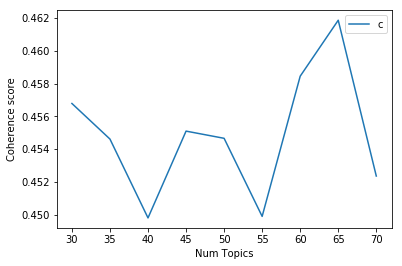

In [0]:
# Show graph
limit=71; start=30; step=5;

x = cv_series.index
y = cv_series.values

plt.plot(x, y)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [0]:
%%time

# Build LDA model
num_topics = 65
lda = LdaMulticore(corpus=corpus, id2word=id2word, random_state=42, num_topics=num_topics, passes=5, workers=4)

CPU times: user 2min 24s, sys: 1min 2s, total: 3min 27s
Wall time: 2min 5s


In [0]:
# Print the Keyword in the 10 topics

print(lda.print_topics())
doc_lda = lda[corpus]

[(5, '0.087*"de" + 0.042*"la" + 0.034*"que" + 0.031*"y" + 0.026*"el" + 0.023*"en" + 0.017*"un" + 0.015*"se" + 0.015*"una" + 0.011*"los"'), (53, '0.012*"life" + 0.007*"\r\r\n" + 0.005*"work" + 0.004*"year" + 0.004*"book" + 0.004*"live" + 0.004*"world" + 0.004*"chance" + 0.003*"love" + 0.003*"dass"'), (20, '0.007*"\r\r\n" + 0.006*"world" + 0.005*"book" + 0.005*"bir" + 0.004*"new" + 0.004*"find" + 0.004*"New" + 0.004*"story" + 0.003*"help" + 0.003*"Miles"'), (27, '0.007*"o" + 0.006*"de" + 0.006*"\r\r\n" + 0.005*"great" + 0.004*"dragon" + 0.004*"grandfather" + 0.004*"roman" + 0.004*"know" + 0.004*"în" + 0.003*"un"'), (26, '0.022*"من" + 0.022*"في" + 0.014*"de" + 0.012*"على" + 0.008*"أن" + 0.008*"إلى" + 0.007*"هذا" + 0.006*"عن" + 0.006*"لا" + 0.006*"الكتاب"'), (34, '0.008*"\r\r\n" + 0.008*"year" + 0.007*"’s" + 0.007*"life" + 0.006*"come" + 0.006*"child" + 0.005*"find" + 0.004*"world" + 0.004*"new" + 0.004*"love"'), (49, '0.009*"New" + 0.009*"’s" + 0.008*"world" + 0.008*"York" + 0.008*"\r\r\n

In [0]:
%%time
# Compute Perplexity
print('\nPerplexity: ', lda.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


Perplexity:  -9.531930196941367
CPU times: user 52.9 s, sys: 28 s, total: 1min 20s
Wall time: 25.1 s


In [0]:
%%time
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda, texts=tokens, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.47318318863197906
CPU times: user 4.01 s, sys: 287 ms, total: 4.29 s
Wall time: 14.1 s


In [0]:
def format_topics_sentences(ldamodel=lda, corpus=corpus, texts=tokens):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [0]:
%%time

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda, corpus=corpus, texts=tokens[:100])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

CPU times: user 3min 33s, sys: 47.5 s, total: 4min 20s
Wall time: 2min 44s


In [0]:
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,57.0,0.5569,"life, \r\r\n, world, story, day, know, death, ...","[survive, wild, sure, live, morning?in, ruin, ..."
1,1,25.0,0.2282,"’s, \r\r\n, Harry, life, find, love, Weston, y...","[door, end, silent, corridor, ’, haunt, Harry,..."
2,2,33.0,0.3496,"book, life, story, \r\r\n, year, reader, world...","[unforgettable, novel, childhood, sleepy, sout..."
3,3,37.0,0.6133,"’, life, \r\r\n, year, , know, good, like, ’...","[alternate, cover, edition, ISBN, 978067978326..."
4,4,64.0,0.6330,"life, \r\r\n, know, family, year, secret, love...","[thing, absolutely, positive, Edward, vampire,..."
5,5,56.0,0.9910,"’, not, world, \r\r\n, life, go, girl, find, y...","[1939, Nazi, Germany, country, hold, breath, d..."
6,6,27.0,0.3349,"o, de, \r\r\n, great, dragon, grandfather, rom...","[George, Orwell, timeless, timely, allegorical..."
7,7,33.0,0.2420,"book, life, story, \r\r\n, year, reader, world...","[journey, end, world, fantastic, creature, epi..."
8,8,15.0,0.2555,"year, life, \r\r\n, story, world, ’s, old, tim...","[volume, box, set, contain, J.R.R., Tolkien, e..."
9,9,6.0,0.3199,"life, \r\r\n, novel, love, year, man, new, fam...","[Margaret, Mitchell, monumental, epic, South, ..."
